In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

import warnings
warnings.simplefilter('ignore')


In [2]:
df = pd.read_csv('../data5/pima-indians-diabetes.data.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    stratify = y_data
                                                   )

In [16]:
# validation_fraction = 0.1 -> 10프로를 검정 셋으로 사용
m_pip = make_pipeline( StandardScaler() , MLPClassifier( early_stopping = True))
m_pip.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [6]:
m_mlp = MLPClassifier(early_stopping = True, verbose = 1 )
m_mlp.fit(x_train, y_train)

Iteration 1, loss = inf
Validation score: 0.403226
Iteration 2, loss = inf
Validation score: 0.500000
Iteration 3, loss = inf
Validation score: 0.612903
Iteration 4, loss = 2.40229366
Validation score: 0.645161
Iteration 5, loss = 3.16003713
Validation score: 0.645161
Iteration 6, loss = 2.58229258
Validation score: 0.645161
Iteration 7, loss = 1.44468172
Validation score: 0.596774
Iteration 8, loss = 1.32411832
Validation score: 0.483871
Iteration 9, loss = 1.60196154
Validation score: 0.483871
Iteration 10, loss = 1.19456058
Validation score: 0.645161
Iteration 11, loss = 0.92665728
Validation score: 0.693548
Iteration 12, loss = 1.15268287
Validation score: 0.725806
Iteration 13, loss = 1.02670518
Validation score: 0.612903
Iteration 14, loss = 0.83284349
Validation score: 0.612903
Iteration 15, loss = 0.91195044
Validation score: 0.596774
Iteration 16, loss = 0.83574660
Validation score: 0.629032
Iteration 17, loss = 0.77190520
Validation score: 0.645161
Iteration 18, loss = 0.7803

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [18]:
m_pip.named_steps['mlpclassifier'].loss_curve_

[0.7935902610618216,
 0.766640811673919,
 0.7416983179170072,
 0.7184591599833955,
 0.6978622034353531,
 0.6780873625062983,
 0.6608160478654421,
 0.64443572424213,
 0.6293507372221775,
 0.6161465514762035,
 0.6039030013593557,
 0.5928247140854545,
 0.5821418834544407,
 0.5728930055290476,
 0.564126539512398,
 0.5562937853059357,
 0.5490091226723782,
 0.5423106343533916,
 0.5361486620898012,
 0.5305681488140938,
 0.5251318739839209,
 0.5202113402638112,
 0.5156007502496273,
 0.5115224957201183,
 0.5076360465817569,
 0.5037793650651954,
 0.5004416486424429]

In [17]:
m_pip.named_steps['mlpclassifier'].validation_scores_

[0.3064516129032258,
 0.3548387096774194,
 0.45161290322580644,
 0.5483870967741935,
 0.6290322580645161,
 0.6612903225806451,
 0.7258064516129032,
 0.7258064516129032,
 0.7419354838709677,
 0.7741935483870968,
 0.7741935483870968,
 0.7580645161290323,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7903225806451613,
 0.7903225806451613,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7903225806451613,
 0.7903225806451613]

In [7]:
# 학습간 cost 값
m_mlp.loss_curve_

[inf,
 inf,
 inf,
 2.402293657985571,
 3.160037132607294,
 2.582292583406851,
 1.4446817162897165,
 1.324118323864915,
 1.6019615395689075,
 1.1945605824985273,
 0.9266572825228913,
 1.1526828728138836,
 1.026705175456445,
 0.8328434931730158,
 0.9119504356427202,
 0.8357465963847974,
 0.7719051966790602,
 0.7803363381336604,
 0.7235628091516729,
 0.7171382293750538,
 0.7003379180359993,
 0.6862253895089054,
 0.6687875732782054]

In [9]:
# 검증셋의 점수
m_mlp.validation_scores_

[0.4032258064516129,
 0.5,
 0.6129032258064516,
 0.6451612903225806,
 0.6451612903225806,
 0.6451612903225806,
 0.5967741935483871,
 0.4838709677419355,
 0.4838709677419355,
 0.6451612903225806,
 0.6935483870967742,
 0.7258064516129032,
 0.6129032258064516,
 0.6129032258064516,
 0.5967741935483871,
 0.6290322580645161,
 0.6451612903225806,
 0.6129032258064516,
 0.5967741935483871,
 0.5967741935483871,
 0.6129032258064516,
 0.6451612903225806,
 0.5806451612903226]

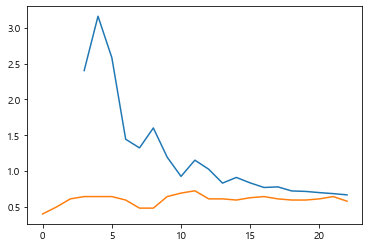

In [10]:
plt.plot(m_mlp.loss_curve_)
plt.plot(m_mlp.validation_scores_)
plt.show()